# Trabalho de Aprendizado de Máquinas

## Aluno: João Lucas Duim

In [1]:
library(dplyr)
library(tidyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## 1. Introdução

Carreguemos os dados que utilizaremos e vejamos um pouco de sua estrutura:

In [2]:
bikeshare = read.csv("Bikeshare.csv") # Lê os dados

glimpse(bikeshare) # Apresenta as dimensões do dataset, além de nome, tipo e os primeiros valores das variáveis 

Observations: 8,645
Variables: 16
$ X          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1...
$ season     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ mnth       <fct> Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, J...
$ day        <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ hr         <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16...
$ holiday    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ weekday    <int> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,...
$ workingday <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ weathersit <fct> clear, clear, clear, clear, clear, cloudy/misty, clear, ...
$ temp       <dbl> 0.24, 0.22, 0.22, 0.24, 0.24, 0.24, 0.22, 0.20, 0.24, 0....
$ atemp      <dbl> 0.2879, 0.2727, 0.2727, 0.2879, 0.2879, 0.2576, 0.2727, ...
$ hum        <dbl> 0.81, 0.80, 0.80, 0.75, 0.75, 0.75, 0.80, 0.86, 0.75, 0....
$ windspeed  <dbl>

Os dados a serem analisados são do sistema de bicicletas compartilhadas de Washington DC ao longo de $1$ ano. Os ciclistas podem alugar bicicletas de um local e retorná-las em um local diferente. Os dados foram obtidos através do [website](https://www.statlearning.com/resources-second-edition) do livro "An Introduction to Statistical Learning". Vejamos as primeiras linhas do dataset:

In [3]:
head(bikeshare) # Apresenta as primeiras linhas do dataset

X,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
1,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
2,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
3,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
4,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
5,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
6,1,Jan,1,5,0,6,0,cloudy/misty,0.24,0.2576,0.75,0.0896,0,1,1


A variável "season" está codificada com $1$, $2$, $3$ e $4$ representando, respectivamente, o inverno, primavera, verão e outono. São registrados os dias ("day") do ano de $1$ a $365$, classificados por mês ("mnth"), dia da semana ("weekday"), se é feriado ("holiday" = $1$) ou não ("holiday" = $0$) e se é dia útil ("workingday" = $1$) ou não ("workingday" = $0$). Estão presentes a condição atmosférica ("weathersit"), a temperatura normalizada ("temp"), a sensação térmica normalizada ("atemp"), a umidade do ar ("hum") e a velocidade do vento normalizada ("windspeed"). As normalizações referidas são tais que o valor mínimo passa a ser $0$ e o valor máximo passa a ser $1$. Existem dois tipos de usuários: usuários casuais ("casual"), que alugam a bicicleta por uma taxa única, e usuários registrados ("registered"), que pagam uma taxa de associação anual em troca do aluguel ilimitado de bicicletas. Assim, o total de ciclistas ("bikers") é dado pela soma de usuários casuais com usuários registrados ("bikers" = "casual" + "registered"). As medições foram feitas a cada $1$ hora ("hr"), com exceção de alguns dados faltantes.

## 2. Análise Exploratória

In [4]:
summary(bikeshare$bikers) # Apresenta um resumo de medidas a respeito da variável bikers

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    31.0   109.0   143.8   211.0   651.0 

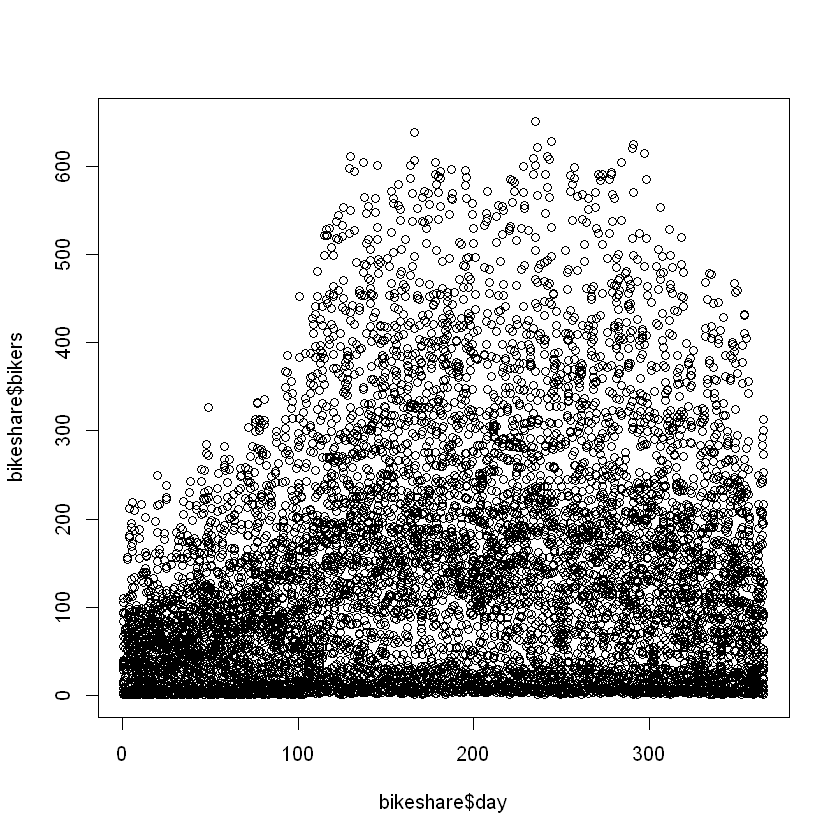

In [5]:
plot(bikeshare$day, bikeshare$bikers) # Realiza um plot simples do número de ciclistas por dia do ano